In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [18]:
X_digits, y_digits = load_digits(return_X_y=True)
data = scale(X_digits)

n_samples, n_features = data.shape
n_digits = len(np.unique(y_digits))
labels = y_digits
labels = pd.DataFrame(labels)
labels.columns = ['labels']
print(labels)

      labels
0          0
1          1
2          2
3          3
4          4
...      ...
1792       9
1793       0
1794       8
1795       9
1796       8

[1797 rows x 1 columns]


In [19]:
print(X_digits.shape)
print(y_digits.shape)
print(data.shape)

(1797, 64)
(1797,)
(1797, 64)


### PCA, Create model, training and prediction

In [20]:
#PCA 차원축소
reduced_data = PCA(n_components=2).fit_transform(data)
#create model
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
import pandas as pd

#prediction
pred = pd.DataFrame(kmeans.predict(reduced_data))
pred.columns=['pred']

#dataframe 만들어주기
f1 = pd.DataFrame(reduced_data[:,0])
f2 = pd.DataFrame(reduced_data[:,1])
f = pd.concat([f1,f2],axis=1)
r = pd.concat([f,pred],axis=1)
r.columns=['f1', 'f2', 'pred']
print(r)

            f1        f2  pred
0     1.914206 -0.954497     2
1     0.588990  0.924643     7
2     1.302065 -0.317221     2
3    -3.020787 -0.868799     0
4     4.528949 -1.093483     5
...        ...       ...   ...
1792  0.104333  0.255064     7
1793  2.423213 -1.429663     2
1794  1.022575 -0.147922     2
1795  1.076057 -0.380882     2
1796 -1.257739 -2.227583     0

[1797 rows x 3 columns]


### 무게중심 계산

In [22]:
centers = pd.DataFrame(kmeans.cluster_centers_,columns=['f1','f2'])
center_x = centers['f1']
center_y = centers['f2']

### visualization

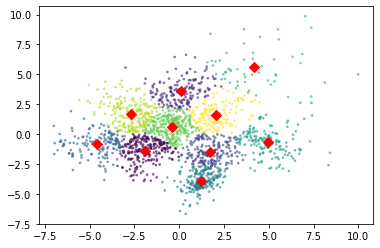

In [23]:
# scatter plot
plt.scatter(r['f1'],r['f2'], s=3, c=r['pred'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='R')
plt.show()

### Evaluate model with Cross tabuliazation

In [24]:
ct = pd.crosstab(labels['labels'],r['pred'])
print (ct)

pred     0    1    2    3    4    5   6   7   8   9
labels                                             
0        2    0  122    0   45    4   0   3   0   2
1       27    4    7    0    2    0   0  72   0  70
2       35    1    1  107    0    0   0  11  16   6
3       41   15    4   40    0    0   0   7  76   0
4        0    0   15    0    0  145   6   1   2  12
5       26   11   10    3    0    1   0  57  64  10
6        0    0   19    0  161    0   0   0   0   1
7        0  107    0    0    0    0  35  11  12  14
8       29    8    9    2    0    0   0  77  27  22
9       66   11    3    7    0    0  12  52  18  11


#########################################################################

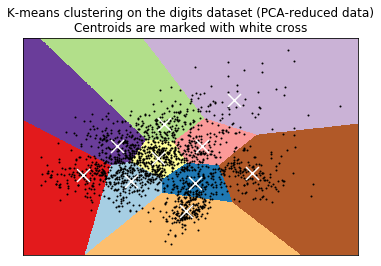

In [25]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])  #ravel : 행렬을 flattern시켜줌

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,    #cmap : 색깔
           aspect='auto', origin='lower')  #밑에 바탕색

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)  #점들이 찍힘
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,  #s: marker의 크기
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### cluster갯수

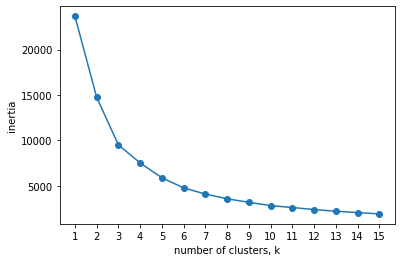

In [9]:
ks = range(1,16)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k,init='k-means++')
    model.fit(reduced_data)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()